In [189]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter, defaultdict
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [193]:
import math

def one_cycle(y1=0.0, y2=1.0, steps=100):
    # lambda function for sinusoidal ramp from y1 to y2 https://arxiv.org/pdf/1812.01187.pdf
    return lambda x: ((1 - math.cos(x * math.pi / steps)) / 2) * (y2 - y1) + y1

In [194]:
lr_fn = one_cycle(1, 0.2, 50)

In [195]:
x = list(range(50))
y = [lr_fn(x_) for x_ in x]

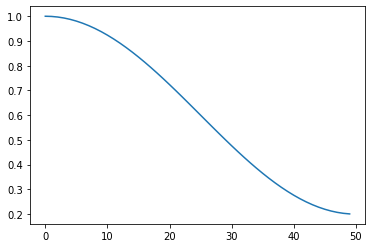

In [196]:
plt.plot(x, y)
plt.show()

In [197]:
coco = COCO('../dataset/test.json')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [179]:
coco.getAnnIds(8)

[43, 44, 45, 46, 47, 48, 49]

In [182]:
coco.loadAnns(coco.getAnnIds(4041))

[{'image_id': 4041,
  'category_id': 1,
  'area': 1047961.69,
  'bbox': [0.0, 0.0, 1023.7, 1023.7],
  'iscrowd': 0,
  'id': 19104},
 {'image_id': 4041,
  'category_id': 1,
  'area': 16647.3,
  'bbox': [0.0, 168.6, 69.8, 238.5],
  'iscrowd': 0,
  'id': 19105},
 {'image_id': 4041,
  'category_id': 1,
  'area': 1047961.69,
  'bbox': [0.0, 0.0, 1023.7, 1023.7],
  'iscrowd': 0,
  'id': 19106},
 {'image_id': 4041,
  'category_id': 1,
  'area': 670472.34,
  'bbox': [201.8, 15.0, 799.8, 838.3],
  'iscrowd': 0,
  'id': 19107},
 {'image_id': 4041,
  'category_id': 1,
  'area': 446071.9,
  'bbox': [235.3, 97.0, 641.0, 695.9],
  'iscrowd': 0,
  'id': 19108},
 {'image_id': 4041,
  'category_id': 1,
  'area': 200511.26,
  'bbox': [37.9, 296.9, 343.4, 583.9],
  'iscrowd': 0,
  'id': 19109}]

In [198]:
with open('test.txt', 'w') as f:
    l = []
    for d in coco.dataset['images']:
        l.append('./images/' + d['file_name'])
    f.write('\n'.join(l))

In [27]:
import random

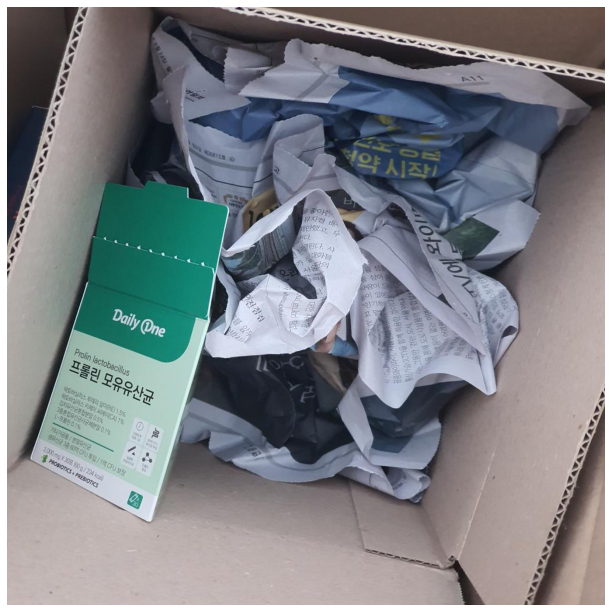

In [183]:
i = random.randint(0,4870)

plt.figure(figsize=(11,11))
img = cv2.imread(f'../dataset/train/4041.jpg')

plt.axis('off')
plt.imshow(img[...,::-1])
plt.show()

In [99]:
coco = COCO('../dataset/train.json')
base_path = '/opt/ml/detection/dataset'

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


In [5]:
dir(coco)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'annToMask',
 'annToRLE',
 'anns',
 'catToImgs',
 'cats',
 'createIndex',
 'dataset',
 'download',
 'getAnnIds',
 'getCatIds',
 'getImgIds',
 'imgToAnns',
 'imgs',
 'info',
 'loadAnns',
 'loadCats',
 'loadImgs',
 'loadNumpyAnnotations',
 'loadRes',
 'showAnns']

In [185]:
# 이미지 랜덤 추출
imgIds = coco.getImgIds()
img = coco.loadImgs(imgIds[4041])[0]
img

{'width': 1024,
 'height': 1024,
 'file_name': 'train/4041.jpg',
 'license': 0,
 'flickr_url': None,
 'coco_url': None,
 'date_captured': '2020-12-27 17:27:15',
 'id': 4041}

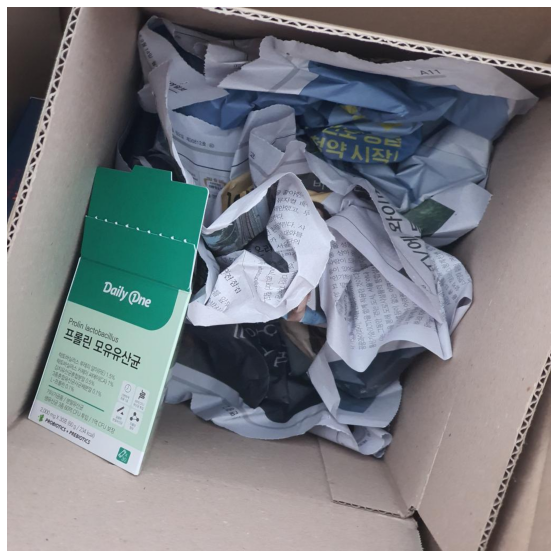

In [186]:
# 이미지 확인

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(cv2.imread(os.path.join(base_path, img['file_name']))[...,::-1])
plt.show()

In [187]:
# 이미지의 박스는 무엇인가?

annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
print(anns)

[19104, 19105, 19106, 19107, 19108, 19109]
[{'image_id': 4041, 'category_id': 1, 'area': 1047961.69, 'bbox': [0.0, 0.0, 1023.7, 1023.7], 'iscrowd': 0, 'id': 19104}, {'image_id': 4041, 'category_id': 1, 'area': 16647.3, 'bbox': [0.0, 168.6, 69.8, 238.5], 'iscrowd': 0, 'id': 19105}, {'image_id': 4041, 'category_id': 1, 'area': 1047961.69, 'bbox': [0.0, 0.0, 1023.7, 1023.7], 'iscrowd': 0, 'id': 19106}, {'image_id': 4041, 'category_id': 1, 'area': 670472.34, 'bbox': [201.8, 15.0, 799.8, 838.3], 'iscrowd': 0, 'id': 19107}, {'image_id': 4041, 'category_id': 1, 'area': 446071.9, 'bbox': [235.3, 97.0, 641.0, 695.9], 'iscrowd': 0, 'id': 19108}, {'image_id': 4041, 'category_id': 1, 'area': 200511.26, 'bbox': [37.9, 296.9, 343.4, 583.9], 'iscrowd': 0, 'id': 19109}]


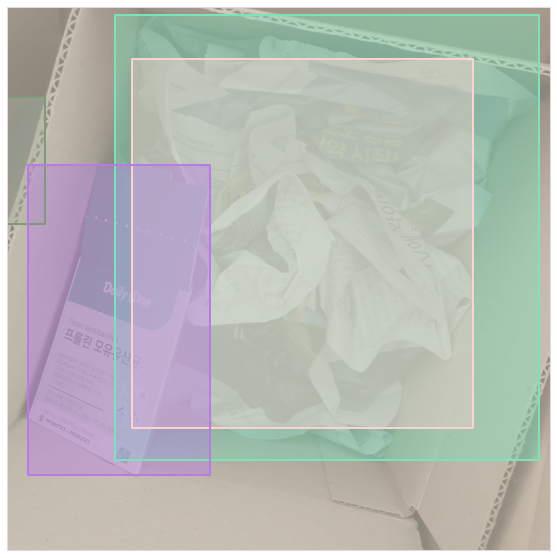

In [188]:
# Box 표시

for d in anns:
    d['segmentation'] = []

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(cv2.imread(os.path.join(base_path, img['file_name']))[...,::-1])
coco.showAnns(anns, draw_bbox=True)
plt.show()

* Total 4883 images
* All images are of size 1024 x 1024
* All files are unique (no duplicate)

* 10 Classes ['General trash',
 'Paper',
 'Paper pack',
 'Metal',
 'Glass',
 'Plastic',
 'Styrofoam',
 'Plastic bag',
 'Battery',
 'Clothing']
 
 

In [103]:
next(iter(coco.anns.values()))

{'image_id': 0,
 'category_id': 0,
 'area': 257301.66,
 'bbox': [197.6, 193.7, 547.8, 469.7],
 'iscrowd': 0,
 'id': 0}

In [116]:
from collections import defaultdict

dd = defaultdict(list)

for d in coco.anns.values():
    dd[d['image_id']].append(d['category_id'])    

In [117]:
ddd = [0]*10
dddd = [0]*10
for k, v in dd.items():
    if len(v) == 1:
        ddd[v[0]] += 1
    for x in v:
        dddd[x] += 1

In [118]:
ddd = np.array(ddd)
dddd = np.array(dddd)

np.sum(ddd), np.sum(dddd)

(1980, 23144)

In [124]:
coco.dataset['categories']

[{'id': 0, 'name': 'General trash', 'supercategory': 'General trash'},
 {'id': 1, 'name': 'Paper', 'supercategory': 'Paper'},
 {'id': 2, 'name': 'Paper pack', 'supercategory': 'Paper pack'},
 {'id': 3, 'name': 'Metal', 'supercategory': 'Metal'},
 {'id': 4, 'name': 'Glass', 'supercategory': 'Glass'},
 {'id': 5, 'name': 'Plastic', 'supercategory': 'Plastic'},
 {'id': 6, 'name': 'Styrofoam', 'supercategory': 'Styrofoam'},
 {'id': 7, 'name': 'Plastic bag', 'supercategory': 'Plastic bag'},
 {'id': 8, 'name': 'Battery', 'supercategory': 'Battery'},
 {'id': 9, 'name': 'Clothing', 'supercategory': 'Clothing'}]

In [119]:
ddd = ddd/np.sum(ddd)
dddd = dddd/np.sum(dddd)
ddd, dddd

(array([0.2520202 , 0.13080808, 0.08737374, 0.11363636, 0.04292929,
        0.13282828, 0.02323232, 0.18333333, 0.00353535, 0.03030303]),
 array([0.17136191, 0.27445558, 0.03875735, 0.04044245, 0.04243   ,
        0.12716039, 0.05457138, 0.22372969, 0.00687003, 0.02022122]))

In [10]:
# 이미지당 박스 갯수 분포

In [161]:
len(coco.getImgIds())

4883

In [160]:
counts[0]

0

In [159]:
counts[0] + counts[1] + counts[2] + counts[3] + counts[4] +counts[5]

3645

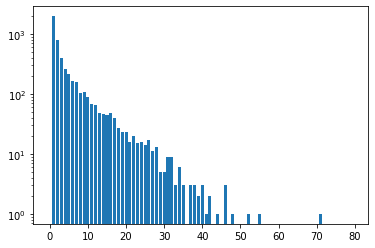

In [155]:
n_annos = [0]*len(coco.getImgIds())

for d in coco.anns.values():
    n_annos[d['image_id']] += 1
    
annos_counter = Counter(n_annos)
counts = [0]*80

for c, n in annos_counter.items():
    counts[c] = n
    
plt.bar(list(range(len(counts))), counts, log=True)
plt.show()

In [ ]:
# 박스의 가로 세로 길이 산포도

In [25]:
w = []
h = []
s = []
r = []
sizes = [0,0,0]
for d in coco.anns.values():
    x1, y1, w1, h1 = d['bbox']
    w.append(w1)
    h.append(h1)
    s.append(w1*h1)
    r.append(w1/h1)
    
    if w1*h1 <= 1024*4:
        sizes[0] += 1
    elif w1*h1 <= 9216*4:
        sizes[1] += 1
    else:
        sizes[2] += 1

In [26]:
sizes = np.array(sizes)
sizes = sizes/sum(sizes)

In [27]:
sizes

array([0.13040097, 0.35737124, 0.51222779])

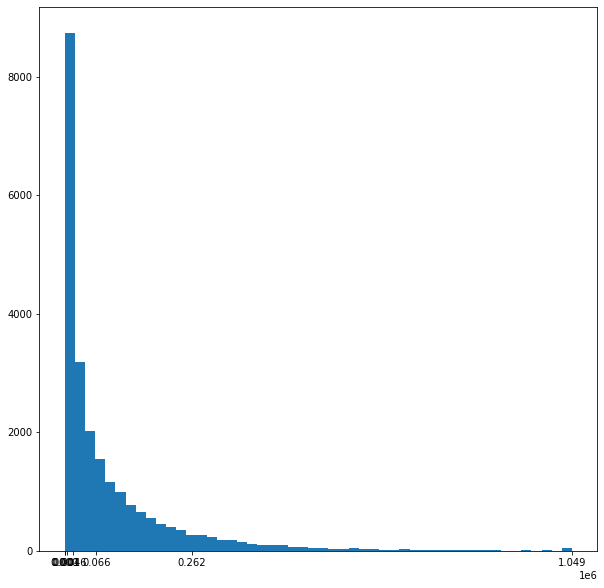

In [20]:
plt.figure(figsize=(10,10))
plt.hist(s, bins=50)
plt.xticks([16**2, 32**2, 64**2, 128**2, 256**2, 512**2, 1024**2])
plt.show()

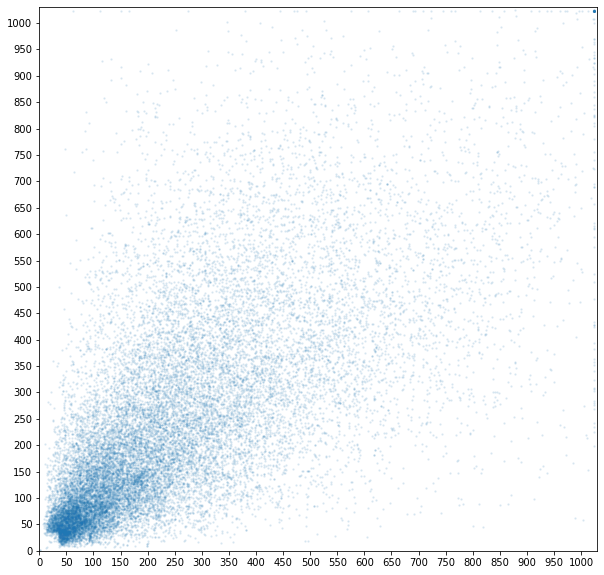

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(w, h, s=2, alpha=0.1)
plt.xlim(0, 1030)
plt.ylim(0, 1030)
plt.xticks([50*i for i in range(1050//50)])
plt.yticks([50*i for i in range(1050//50)])
plt.show()

In [76]:
# 박스의 모양(비율) 분포 (x축은 log분포)

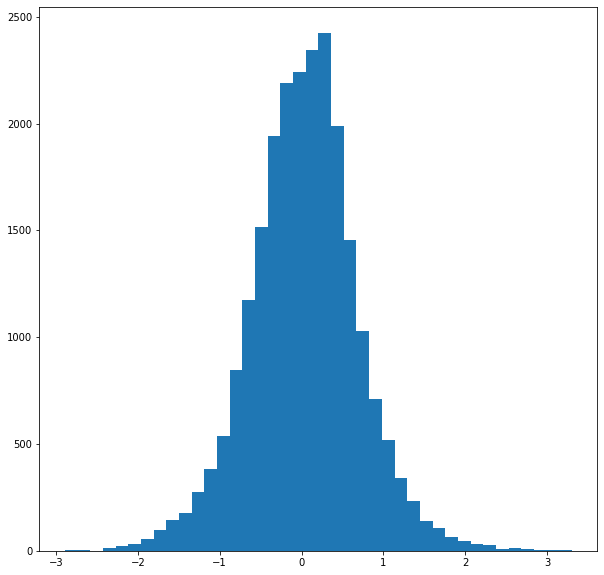

In [87]:
import numpy as np
plt.figure(figsize=(10,10))
plt.hist(np.log(r), bins=40)
plt.show()

 => 1:1 비율의 빈도수가 많고 2:1, 1:2 정도면 어느정도 다 커버되는것으로 보인다.

In [95]:
# 박스의 길이(sqrt(w*h)) 분포

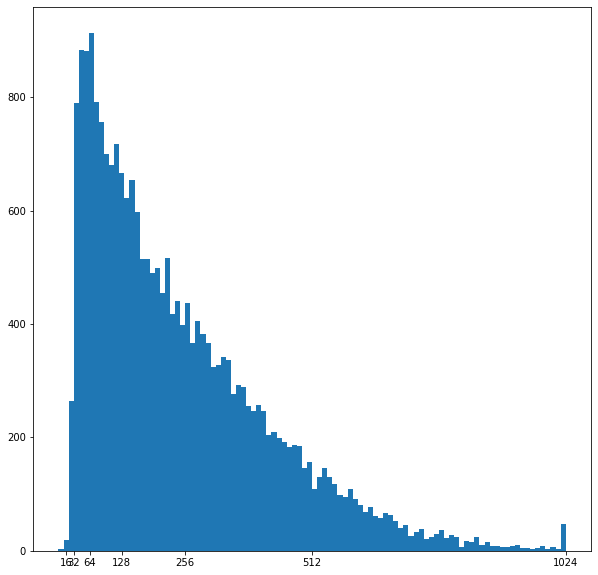

In [21]:
plt.figure(figsize=(10,10))
plt.hist([x**0.5 for x in s], bins=100)
plt.xticks([16, 32, 64, 128, 256, 512, 1024])
plt.show()

In [ ]:
# 아래는 그냥 train/val split 과정

In [1]:
import json

with open('../dataset/train.json') as json_file:
    json_data = json.load(json_file)

In [7]:
import numpy as np
from sklearn.model_selection import KFold
import copy

kf = KFold(n_splits=5, random_state=42, shuffle=True)
X = json_data['images']

for i, (train_index, test_index) in enumerate(kf.split(X), 1):
    
    json_train = copy.deepcopy(json_data)
    json_val = copy.deepcopy(json_data)

    json_train['images'] = [X[j] for j in train_index]
    json_val['images'] = [X[j] for j in test_index]

    imgs = set(d['id'] for d in json_train['images'])
    json_train['annotations']= [d for d in json_train['annotations'] if d['image_id'] in imgs]

    imgs = set(d['id'] for d in json_val['images'])
    json_val['annotations']= [d for d in json_val['annotations'] if d['image_id'] in imgs]
    
    print(len(json_train['images']), len(json_val['images']))
    
    with open(f"train_split{i}.json", "w") as json_file:
        json.dump(json_train, json_file)

    with open(f"val_split{i}.json", "w") as json_file:
        json.dump(json_val, json_file)

3906 977
3906 977
3906 977
3907 976
3907 976


In [28]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(json_data['images'], test_size=0.2, random_state=42)

In [34]:
import copy

json_train = copy.deepcopy(json_data)
json_val = copy.deepcopy(json_data)

json_train['images'] = train
json_val['images'] = val

In [42]:
imgs = set(d['id'] for d in json_train['images'])
json_train['annotations']= [d for d in json_train['annotations'] if d['image_id'] in imgs]

imgs = set(d['id'] for d in json_val['images'])
json_val['annotations']= [d for d in json_val['annotations'] if d['image_id'] in imgs]

In [50]:
with open("train_split.json", "w") as json_file:
    json.dump(json_train, json_file)

with open("val_split.json", "w") as json_file:
    json.dump(json_val, json_file)